In [1]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix


In [2]:
results = pd.read_csv("/home/divya/Documents/results_2.csv")


In [3]:
# y_true = results.loc[:,'Actual']
y_true=[]
for i in range (len(results['Actual'])):
    y_true.append(results['Actual'][i])
# y_true = results['Actual']
print(y_true)


['H', 'A', 'H', 'D', 'A', 'H', 'D', 'A', 'H', 'H', 'A', 'D', 'H', 'H', 'A', 'D', 'D', 'D', 'H', 'A', 'A', 'A', 'A', 'H', 'A', 'A', 'D', 'D', 'H', 'H', 'H', 'D', 'H', 'A', 'H', 'D']


In [4]:
# y_true = results.loc[:,'Actual']
y_pred=[]
for i in range (len(results['Predicted'])):
    y_pred.append(results['Predicted'][i])
# y_true = results['Actual']
print(y_pred)

['H', 'A', 'H', 'H', 'H', 'H', 'H', 'A', 'H', 'H', 'A', 'H', 'H', 'H', 'A', 'H', 'H', 'A', 'A', 'A', 'A', 'H', 'H', 'H', 'A', 'H', 'H', 'A', 'H', 'H', 'H', 'H', 'H', 'A', 'H', 'A']


In [5]:
classes = ['H','A','D']

confusion_matrix(y_true, y_pred, labels=['H', 'A', 'D'])

array([[13,  1,  0],
       [ 4,  8,  0],
       [ 7,  3,  0]])

In [6]:
accuracy_score(y_true,y_pred)

0.5833333333333334

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(6,6)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
#     accuracy = np.trace(cm_analysis) / float(np.sum(cm_analysis))
#     misclass = 1 - accuracy

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape

    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
                
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax,xticklabels = 1,square=True)
#     print(ax.get_ylim())
    ax.set_ylim(3.0, 0)
    ax.set_yticklabels(y_true, va='baseline', rotation = 0, position=(0,0),minor=False)
    plt.savefig(filename)
#     plt.figure(figsize=(5.5,4))
#     sns.heatmap(cm_df, annot=True)
    plt.title('poisson \nAccuracy:{0:.3f}'.format(accuracy_score(y_true, y_pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    

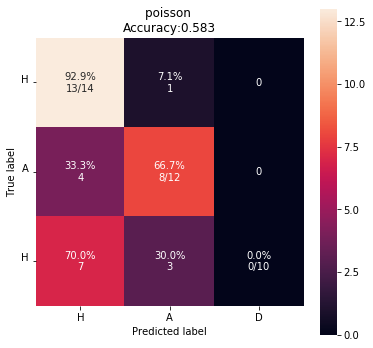

In [8]:
cm_analysis(y_true,y_pred,'conf_matrix' ,classes)

In [9]:
print(classification_report(y_true, y_pred, target_names=classes))

              precision    recall  f1-score   support

           H       0.67      0.67      0.67        12
           A       0.00      0.00      0.00        10
           D       0.54      0.93      0.68        14

    accuracy                           0.58        36
   macro avg       0.40      0.53      0.45        36
weighted avg       0.43      0.58      0.49        36



/home/divya/Prospero/venvs/dev/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
